In [1]:
import random
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [33]:
def gen(conditioning, p=True):
    c_color = random.randrange(430, 771)
    s_color = c_color - (random.randrange(50))
    delta = abs(c_color - s_color)
    redundance_test = None
    
    if p:
        print('\n'.join((
            f"Conditioning color is {c_color} nm",
            f"Conditioning intensity is {conditioning}",
            f"Stimulus color is {s_color} nm.",
            f"∆ (difference between colors) is {delta} nm.")
        ))

    if delta <= 40:
        redundance_test = (40 - delta)/40
        response = (conditioning * redundance_test) ** 1.5
        if p:
            return '\n'.join((f"Redundance test is {redundance_test}",
                              f"Response is {response}.\n"))
        else:
            return delta, conditioning, response

    else:
        response = 0
        if p:
            return "Response is null.\n"
        else:
            return delta, conditioning, response

In [34]:
print(gen(1.0, p=True))
print(gen(1.25, p=True))
print(gen(1.5, p=True))

Conditioning color is 760 nm
Conditioning intensity is 1.0
Stimulus color is 722 nm.
∆ (difference between colors) is 38 nm.
Redundance test is 0.05
Response is 0.01118033988749895.

Conditioning color is 565 nm
Conditioning intensity is 1.25
Stimulus color is 555 nm.
∆ (difference between colors) is 10 nm.
Redundance test is 0.75
Response is 0.9077304717673633.

Conditioning color is 430 nm
Conditioning intensity is 1.5
Stimulus color is 382 nm.
∆ (difference between colors) is 48 nm.
Response is null.



In [36]:
def plot_gen(conditioning, n):
    distribution = []
    
    for n in range(n):
        distribution.append(gen(conditioning, p=False))
        
    delta, response = [i[0] for i in distribution], [i[2] for i in distribution]
    
    plt.xlim(0, 50)
    plt.ylim(0.0, 2.5)
    plt.title("")

    def gauss_values():
        gauss_resp = [i for i in response if i > 0.01]
        parameters = norm.fit(distribution)

        print(f"When conditioning degree is {conditioning},")
        print(f"N = {np.mean(gauss_resp)}")
        print(f"sig = {np.std(gauss_resp)}")
        print(parameters)
    
    return plt.scatter(x=delta, y=response), gauss_values() 

When conditioning degree is 1.0,
N = 0.3452602831067021
sig = 0.33108140903572325
(8.511086761035568, 14.101785064320465)
When conditioning degree is 1.25,
N = 0.47036577137233826
sig = 0.4439365377165329
(8.72412192379078, 14.005878689380134)
When conditioning degree is 1.5,
N = 0.5521096834364102
sig = 0.5456934655951515
(9.14403656114547, 13.907796285611923)


(<matplotlib.collections.PathCollection at 0x1a25317b38>, None)

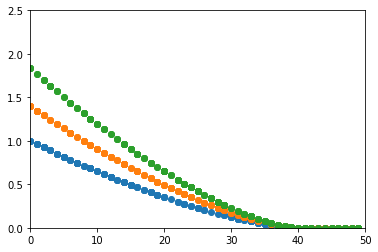

In [37]:
plot_gen(1.0, 250)
plot_gen(1.25, 250)
plot_gen(1.5, 250)

In [ ]:
distribution = []

for n in range(250):
    distribution.append(generalization(1.5, p=False))


deltas, response = [i[0] for i in distribution], [i[2] for i in distribution]
plt.xlim(0, 50)
plt.ylim(0.0, 2.5)
plt.scatter(x=deltas, y=response)
plt.show()

gauss_resp = [i for i in response if i > 0.1]

print(f"N = {np.mean(gauss_resp)}")
print(f"sig = {np.std(gauss_resp)}")

In [ ]:
def gauss_values(distribution):
    deltas, response = [i[0] for i in distribution], [i[2] for i in distribution]
    gauss_resp = [i for i in response if i > 0.1]
    print(f"N = {np.mean(gauss_resp)}")
    print(f"sig = {np.std(gauss_resp)}\n")
    return np.mean(gauss_resp), np.std(gauss_resp)

In [ ]:
d1, d2, d3 = [], [], []
for n in range(1000):
    d1.append(generalization(1.0, p=False))
    d2.append(generalization(1.25, p=False))
    d3.append(generalization(1.5, p=False))

for d in (d1, d2, d3):
    gauss_values(d)

In [ ]:
def make_gauss(N, sig, mu):
    return lambda x: N/(sig * (2*np.pi)**.5) * np.e ** (-(x-mu)**2/(2 * sig**2))